In [1]:
import matplotlib.pyplot as plt
import argparse
from DataProcessing import getNodes, makeNodeMalicious
from Model import getModel
import random
import joblib

In [2]:
nodes, x_test, y_test = getNodes()

In [3]:
model = getModel("ResNet50")

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 10)                20490     
                                                                 
Total params: 23,608,202
Trainable params: 23,555,082
Non-trainable params: 53,120
_________________________________________________________________


In [5]:
epoch = 5
mnode = 10
position = "front"

In [6]:
if position == "front":
    for node_obj in nodes[:mnode]:
        makeNodeMalicious(node_obj)

elif position == "end":
    starting = len(nodes) - mnode
    for node_obj in nodes[starting:]:
        makeNodeMalicious(node_obj)

elif position == "random":
    for node_obj in nodes[:mnode]:
        makeNodeMalicious(node_obj)
    random.shuffle(nodes)

elif position == "none":
    print("Running federated learning without malicious nodes.")

else:
    print("Peleze, give correct position argument!")
    exit()

In [7]:
# for i in range(100):
#     print("Node "+str(i)+" says: ",end="")
#     nodes[i].whatAmI()

In [8]:
total_loss = []
for node_obj in nodes:
    node_obj.send_model(model)
    total_loss = total_loss + node_obj.train(epoch)
    model = node_obj.get_model()

2022-11-27 23:06:32.863106: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Node:  0  says: Traning complete.
Node:  1  says: Traning complete.
Node:  2  says: Traning complete.
Node:  3  says: Traning complete.
Node:  4  says: Traning complete.
Node:  5  says: Traning complete.
Node:  6  says: Traning complete.
Node:  7  says: Traning complete.
Node:  8  says: Traning complete.
Node:  9  says: Traning complete.
Node:  10  says: Traning complete.
Node:  11  says: Traning complete.
Node:  12  says: Traning complete.
Node:  13  says: Traning complete.
Node:  14  says: Traning complete.
Node:  15  says: Traning complete.
Node:  16  says: Traning complete.
Node:  17  says: Traning complete.
Node:  18  says: Traning complete.
Node:  19  says: Traning complete.
Node:  20  says: Traning complete.
Node:  21  says: Traning complete.
Node:  22  says: Traning complete.
Node:  23  says: Traning complete.
Node:  24  says: Traning complete.
Node:  25  says: Traning complete.
Node:  26  says: Traning complete.
Node:  27  says: Traning complete.
Node:  28  says: Traning compl

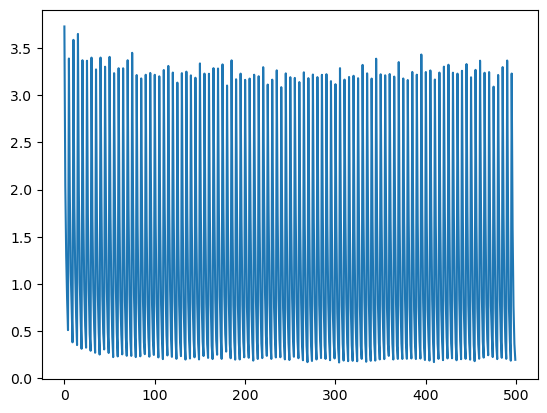

In [9]:
plt.plot(total_loss)

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 12s 38ms/step - loss: 3.2392 - accuracy: 0.0986


[3.239180564880371, 0.09860000014305115]

In [ ]:
plt.savefig('loss_graph.png')
joblib.dump(model, "Reset50"+".model")

In [ ]:
model = joblib.load("Reset50"+".model")

In [ ]:
import tensorflow as tf
from keras import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import keras.utils.np_utils as kutils

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0
y_test = kutils.to_categorical(y_test, 10)
y_train = kutils.to_categorical(y_train, 10)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=100, verbose=1, validation_split=0.1)
loss = history.history['loss']
plt.plot(loss)